## Reinforcement Learning
![intro](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRQbPftOs4MgPHo3sI07NFflfjB0JwEJRTY3XX8yARgohl640fI)
## Definition
Reinforcement Learning is the science of making optimal decisions using experience. It is categorized with supervised learning and unsupervised learning, rather than categorizing it with Machine Learning and Deep Learning. Reinforcement learning is the methodology that deals with the interaction between agent and environment  through actions and has got nothing to do with labeled and unlabeled data,  although there is another category called **Semi-supervised learning**, which is indeed a hybrid of supervised and unsupervised learning.<br><br>
The word "reinforce" means strengthen or support (an object or substance), especially with additional material.
<br>
But what we are strengthening here, and what is our support which strengthen?<br>
We are trying to strengthen the learning ability of an **agent** to understand the environment. But that also happens in machine learning and deep learning, where the model is trained and the model learns a pattern from the trained data while minimizing the loss and improving the accuracy. The factor that strengthens the learning ability in reinforcement learning is **Reward**. A high positive reward is awarded to the agent for making a correct decision, and the agent should be penalized for making a wrong decision. The agent should get a slight negative reward for not making a correct decision after every time-step. "Slight" negative because we would prefer our agent to take more time in taking a decision rather than making the wrong decision.

Now, lets talk about some of the most important terms like agent, policy, states.
<br>
In reinforcement learning an **Agent** is a self-learning model that learns some type of interaction between it and the environment. The agent wants to achieve some kind of **goal** within mentioned environment while it interacts with it. This interaction is divided into time steps. In each time step, **action** is performed by agent. This action changes the **state** of the environment and based on the success of it agent gets a certain **reward**. This way the agent learns what actions should be performed an which shouldn’t in a defined environment state. 

At each time step, the agent takes an action on the environment based on its policy $\pi(a_t|s_t)$, where $s_t$ is the current observation from the environment, and receives a reward $r_{t+1}$ and the next observation $s_{t+1}$ from the environment. The goal is to improve the policy so as to maximize the sum of rewards (return). 
> a policy is an agent's strategy.

## Markov Decision Processes (MDPs)
This framework gives us a formal description of the problem in which an agent seeks for the best policy, defined as the function π. Policy maps states of the environment to the best action that the agent can take in certain environment state. Inside of the MDPs, we recognize several concepts, like a set of states – S, a set of actions – A, expected reward that agent will get going from one state to another – Ra(s, s’), etc. 
<br>
Markov Decision Process is tuple of four elements (S, A, Pa, Ra):
* S – Represents the set of states. At each time step t, the agent gets the environment’s state – St, where St ∈ S.
* A – Represents the set of actions that the agent can foretake. At each time step t, based on the received state St, the agent makes the decision to perform an action – At, where At ∈ A(St). A(St) represents a set of possible actions in the state St.
* Pa – Represents the probability that action in some state s will result in the time step t, will result in the state s’ in the time step t+1.
![](https://i0.wp.com/rubikscode.net/wp-content/uploads/2019/06/image-11.png)
* Ra – Or more precisely Ra(s, s’), represents expected reward received after going from state s to the state s’, as a result of action a.

where γ is the discount factor which determines how much importance we want to give to future rewards. In an essence, this value represents quality of an action.

## About this kernel
In this kernel I have discussed and implemented two reinforment learning techniques, both involves the use of neural networks. One of them is **Advantage actor-critic (A2C) agent** and another is **Deep Q-Learning**. 

## Some basic knowledge about the Competition.
In this game, your objective is to get a certain number of your checkers in a row horizontally, vertically, or diagonally on the game board before your opponent. When it's your turn, you “drop” one of your checkers into one of the columns at the top of the board. Then, let your opponent take their turn. This means each move may be trying to either win for you, or trying to stop your opponent from winning. The default number is four-in-a-row.
![](https://storage.googleapis.com/kaggle-media/competitions/ConnectX/Walter's%20image.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import inspect
import random
import gym
import tensorflow as tf
import tensorflow.keras.layers as kl
import tensorflow.keras.losses as kls
import tensorflow.keras.optimizers as ko
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from collections import deque
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/connectx/kaggle-environments-0.1.4/.gcloudignore
/kaggle/input/connectx/kaggle-environments-0.1.4/MANIFEST.in
/kaggle/input/connectx/kaggle-environments-0.1.4/CONTRIBUTING.md
/kaggle/input/connectx/kaggle-environments-0.1.4/.gitignore
/kaggle/input/connectx/kaggle-environments-0.1.4/LICENSE
/kaggle/input/connectx/kaggle-environments-0.1.4/README.md
/kaggle/input/connectx/kaggle-environments-0.1.4/setup.py
/kaggle/input/connectx/kaggle-environments-0.1.4/requirements.txt
/kaggle/input/connectx/kaggle-environments-0.1.4/main.py
/kaggle/input/connectx/kaggle-environments-0.1.4/kaggle_environments/status_codes.json
/kaggle/input/connectx/kaggle-environments-0.1.4/kaggle_environments/core.py
/kaggle/input/connectx/kaggle-environments-0.1.4/kaggle_environments/__init__.py
/kaggle/input/connectx/kaggle-environments-0.1.4/kaggle_environments/schemas.json
/kaggle/input/connectx/kaggle-environments-0.1.4/kaggle_environments/utils.py
/kaggle/input/connectx/kaggle-environments-0.1.4/

In [2]:
#ConnectX environment was defined in v0.1.6
!pip install 'kaggle-environments>=0.1.6'

     |████████████████████████████████| 51kB 2.2MB/s 


In [3]:
from kaggle_environments import evaluate, make, utils
env = make("connectx", debug=True)
env.render()

+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+



In [4]:
env.agents

{'random': <function kaggle_environments.envs.connectx.connectx.random_agent(obs, config)>,
 'negamax': <function kaggle_environments.envs.connectx.connectx.negamax_agent(obs, config)>}

In [5]:
env.configuration

{'timeout': 5, 'columns': 7, 'rows': 6, 'inarow': 4, 'steps': 1000}

In [6]:
env.specification

{'name': 'connectx',
 'title': 'ConnectX',
 'description': 'Classic Connect in a row but configurable.',
 'version': '1.0.0',
 'agents': [2],
 'configuration': {'timeout': {'description': 'Seconds an agent can run before timing out.',
   'type': 'integer',
   'minimum': 1,
   'default': 5},
  'columns': {'description': 'The number of columns on the board',
   'type': 'integer',
   'default': 7,
   'minimum': 1},
  'rows': {'description': 'The number of rows on the board',
   'type': 'integer',
   'default': 6,
   'minimum': 1},
  'inarow': {'description': 'The number of checkers in a row required to win.',
   'type': 'integer',
   'default': 4,
   'minimum': 1},
  'steps': {'description': 'Maximum number of steps the environment can run.',
   'type': 'integer',
   'minimum': 1,
   'default': 1000}},
 'reward': {'description': '0 = Lost, 0.5 = Draw, 1 = Won',
  'enum': [0, 0.5, 1],
  'default': 0.5,
  'type': ['number', 'null']},
 'observation': {'board': {'description': 'Serialized gri

In [7]:
def my_agent(observation, configuration):
    from random import choice
    return choice([c for c in range(configuration.columns) if observation.board[c] == 0])

In [8]:
# Play as first position against random agent.
trainer = env.train([None, "random"])
observation = trainer.reset()

print("Observation contains:\t", observation)
print("Configuration contains:\t", env.configuration)

Observation contains:	 {'board': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'mark': 1}
Configuration contains:	 {'timeout': 5, 'columns': 7, 'rows': 6, 'inarow': 4, 'steps': 1000}


In [9]:
my_action = my_agent(observation, env.configuration)
print("My Action", my_action)
observation, reward, done, info = trainer.step(my_action)
env.render(mode="ipython", width=100, height=90, header=False, controls=False)
print("Observation after:\t", observation)

My Action 2


Observation after:	 {'board': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0], 'mark': 1}


## Train your agent

In [10]:
trainer = env.train([None, "random"])
observation = trainer.reset()
while not env.done:
    my_action = my_agent(observation, env.configuration)
    print("My Action", my_action)
    observation, reward, done, info = trainer.step(my_action)
    print(reward)
env.render(mode="ipython", width=100, height=90, header=False, controls=False)
env.render()

My Action 5
0.5
My Action 2
0.5
My Action 0
0.5
My Action 4
0.5
My Action 6
0.5
My Action 0
0.5
My Action 2
0.5
My Action 2
0.5
My Action 6
0


+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 1 | 0 | 2 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 1 | 0 | 2 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 2 | 0 | 2 | 0 | 0 |
+---+---+---+---+---+---+---+
| 1 | 0 | 1 | 0 | 2 | 2 | 1 |
+---+---+---+---+---+---+---+
| 1 | 2 | 2 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+



In [11]:
def mean_reward(rewards):
    return sum(r[0] for r in rewards)/sum(r[0]+r[1] for r in rewards)
# Run multiple episodes to estimate its performance.
print("My Agent vs Random Agent:", mean_reward(evaluate("connectx", [my_agent, "random"], num_episodes=100)))
print("My Agent vs Negamax Agent:", mean_reward(evaluate("connectx", [my_agent, "negamax"], num_episodes=100)))

My Agent vs Random Agent: 0.59
My Agent vs Negamax Agent: 0.02


In [12]:
# Negamax algorithm
print(inspect.getsource(env.agents['negamax']))

def negamax_agent(obs, config):
    columns = config.columns
    rows = config.rows
    size = rows * columns

    # Due to compute/time constraints the tree depth must be limited.
    max_depth = 4

    def negamax(board, mark, depth):
        moves = sum(1 if cell != EMPTY else 0 for cell in board)

        # Tie Game
        if moves == size:
            return (0, None)

        # Can win next.
        for column in range(columns):
            if board[column] == EMPTY and is_win(board, column, mark, config, False):
                return ((size + 1 - moves) / 2, column)

        # Recursively check all columns.
        best_score = -size
        best_column = None
        for column in range(columns):
            if board[column] == EMPTY:
                # Max depth reached. Score based on cell proximity for a clustering effect.
                if depth <= 0:
                    row = max(
                        [
                            r
                            for r i

In [13]:
# random agent algorithm
print(inspect.getsource(env.agents['random']))

def random_agent(obs, config):
    return choice([c for c in range(config.columns) if obs.board[c] == EMPTY])



## Note
The code shown above this cell in this notebook above shows the configuration, specifications and agents provided by Kaggle themselves for this competitions.

## Declaring the environment 

In [14]:
class ConnectX(gym.Env):
    def __init__(self):
        self.env = make("connectx", debug=True)
        self.pair = [None,"negamax"]
        self.config = self.env.configuration
        self.trainer = self.env.train(self.pair)
        
        # Define required gym fields (examples):
        config = self.env.configuration
        self.action_space = gym.spaces.Discrete(config.columns)
        self.observation_space = gym.spaces.Discrete(config.columns * config.rows)
        
    def step(self,action):
        return self.trainer.step(action)
    def reset(self):
        return self.trainer.reset()
    def render(self, **kwargs):
        return self.env.render(**kwargs)

## The Advantage actor-critic (A2C) agent
Ther are two different reenforcement learning method.<br>
* **Value based method** - Q-learning, Deep Q-learning falls under this category. Here we learn a value that will map sate action pair to a value. These techniques reduce the error between predicted and actual state(-action) values. This works well when you have a finite set of actions.
* **Policy based method** - Policy gardient directly optimize the policy by adjusting the parameters. This is useful when the action space is continuous or stochastic.
<br>
Actor-critic method is a hybrid of both the above mentioned methods. We’ll using two neural networks:
* a Critic that measures how good the action taken is (value-based)
* an Actor that controls how our agent behaves (policy-based)
<br>

policy gradients optimize agent’s policy, and the value-based/temporal-difference method is used as a bootstrap for the expected value estimates.
<br>
In policy gradient method we are ina situation of Monte Carlo, waiting until the end of episode to calculate the reward. We may conclude that if we have a high reward (R(t)), all actions that we took were good, even if some were really bad.<br>
> **What is Monte Carlo Simulation?**<br>
> Monte Carlo simulation is a computerized mathematical technique that allows people to account for risk in quantitative analysis and decision making. Monte Carlo simulation performs risk analysis by building models of possible results by substituting a range of values—a probability distribution—for any factor that has inherent uncertainty. It then calculates results over and over, each time using a different set of random values from the probability functions. Depending upon the number of uncertainties and the ranges specified for them, a Monte Carlo simulation could involve thousands or tens of thousands of recalculations before it is complete. Monte Carlo simulation produces distributions of possible outcome values.

In Actor-Critic, instead of waiting until the end of the episode as we do in Monte Carlo REINFORCE, we make an update at each step. Because we do an update at each time step, we can’t use the total rewards R(t). Instead, we need to train a Critic model that approximates the value function.  This value function replaces the reward function in policy gradient that calculates the rewards only at the end of the episode.

In [15]:
class ProbabilityDistribution(tf.keras.Model):
    def call(self, logits,  **kwargs):
        return tf.squeeze(tf.random.categorical(logits, 1), axis=-1)

In [16]:
class Model(tf.keras.Model):
    def __init__(self, env, num_actions):
        super(Model, self).__init__('mlp_policy')
        self.env = env
        self.num_actions = num_actions
        self.hidden1 = kl.Dense(128, activation='relu')
        self.hidden2 = kl.Dense(128, activation='relu')
        self.value = kl.Dense(1, name='value')
        # Logits are unnormalized log probabilities.
        self.logits = kl.Dense(num_actions,  name='policy_logits')
        self.dist = ProbabilityDistribution()
        self.action_ = None
        self.value_ = None
        self.space = None
        self.empty = []
        
    def call(self, inputs, **kwargs):
        # Inputs is a numpy array, convert to a tensor.
        x = tf.convert_to_tensor(inputs)
        # Separate hidden layers from the same input tensor.
        hidden_logs = self.hidden1(x)
        hidden_vals = self.hidden2(x)
        return self.logits(hidden_logs), self.value(hidden_vals)
    
    def action_value(self, obs):
        # Executes `call()` under the hood.
        logits, values = self.predict_on_batch(obs)
        action = self.dist.predict_on_batch(logits)
        # Another way to sample actions:
        #   action = tf.random.categorical(logits, 1)
        # Will become clearer later why we don't use it.
        
        # The recursion shown below works absolutely fine but, 
        # while commit I am facing recursion error, so I have commented this out
        # This recursion prevents invalid column problem.
        
        #self.action_,  self.value_ = np.squeeze(action, axis = -1), np.squeeze(values, axis=-1)
        #self.space = [c for c in range(self.env.config.columns) if (obs[0][c] == 0)]
        #if self.action_ not in self.space and self.space!=self.empty:
        #    self.action_value(obs)
        return np.squeeze(action, axis = -1), np.squeeze(values, axis=-1)
    
    def preprocess(self, state):
        result = state.board[:]
        result.append(state.mark)

        return result

In [17]:
env = ConnectX()
model = Model(env, num_actions=env.action_space.n)
obs = env.reset()
obs = np.array(model.preprocess(obs))
# No feed_dict or tf.Session() needed at all!
action, value = model.action_value(obs[None, :])
print("Action: " +str(action)+", Value: " + str(value))

Action: 6, Value: [0.04398032]


In [18]:
K.clear_session()
class Agent_Advanced:
    def __init__(self, model, lr=7e-3, gamma=0.8, value_c=0.5, entropy_c=1e-4):
        # Coefficients are used for the loss terms.
        self.value_c = value_c
        self.entropy_c = entropy_c
        # `gamma` is the discount factor
        self.gamma = gamma
        self.model = model
        self.model.compile(
                          optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr),
                          # Define separate losses for policy logits and value estimate.
                          loss=[self._logits_loss, self._value_loss]
        )
    def train(self, env, batch_sz=64, updates=500):
        
        # Training loop: collect samples, send to optimizer, repeat updates times.
        ep_rewards = [0.0]
        next_obs = env.reset()
        next_obs = np.array(model.preprocess(next_obs))
        # Storage helpers for a single batch of data.
        actions = np.empty((batch_sz,), dtype=np.int32)
        rewards, dones, values = np.zeros((3, batch_sz,))
        
        observations = np.empty((batch_sz,len(next_obs.copy())) + env.observation_space.shape)
        for update in range(updates):
            for step in range(batch_sz):
                observations[step] = next_obs.copy()
                #print(observations[step])
                actions[step], values[step] = self.model.action_value(next_obs[None, :])
                next_obs, rewards[step], dones[step], _ = env.step(int(actions[step]))
                
                #values[step] = np.where(dones[step], rewards[step], rewards[step]+self.gamma*values[step])
                
                if rewards[step] >= 0.5: # Won
                    rewards[step] = 20
                elif rewards[step] == 0.0: # Lost
                    rewards[step] = -20
                else: # Draw
                    rewards[step] = 0.05
                ep_rewards[-1] += rewards[step]    
                
                next_obs = np.array(model.preprocess(next_obs))    
                #print(rewards[step])
                if dones[step]:
                    ep_rewards.append(0.0)
                    next_obs = env.reset()
                    next_obs = np.array(model.preprocess(next_obs))
                    print("Episode: %03d, Reward: %03d" % (len(ep_rewards) - 1, ep_rewards[-2]))
                    
                    
                
            _, next_value = self.model.action_value(next_obs[None, :])
            #next_value= np.where(dones, rewards, rewards+self.gamma*values)
            returns, advs = self._returns_advantages(rewards, dones, values, next_value)
            # To input actions and advantages through same API.
            acts_and_advs = np.concatenate([actions[:, None], advs[:, None]], axis=-1)
            # Performs a full training step on the collected batch
            losses = self.model.fit(observations, [acts_and_advs, returns])
            
            print("[%d/%d] Losses: %s" % (update + 1, updates, losses.history['loss']))

        return ep_rewards
    
    def _returns_advantages(self, rewards, done, values, next_value):
        # `next_value` is the bootstrap value estimate of the future state (critic).
        returns = np.append(np.zeros_like(rewards), next_value, axis=-1)
        
        # Returns are calculated as discounted sum of future rewards.
        for t in reversed(range(rewards.shape[0])):
            returns[t] = rewards[t] + self.gamma * returns[t+1] * (1 - done[t])
        returns = returns[:-1]
        # Advantages are equal to returns - baseline (value estimates in our case).
        advantages = returns - values
        
        return returns, advantages
        
    def _value_loss(self, return_, value):
        # Value loss is typically MSE between value estimates and returns.
        return self.value_c * kls.mean_squared_error(return_, value)
    
    def _logits_loss(self, actions_and_advantages, logits):
        actions, advantages = tf.split(actions_and_advantages, 2, axis=-1)
        # Sparse categorical CE loss obj that supports sample_weight arg on `call()`.
        # `from_logits` argument ensures transformation into normalized probabilities.
        weighted_sparse_ce = kls.SparseCategoricalCrossentropy(from_logits=True)
        # Policy loss is defined by policy gradients, weighted by advantages.
        # Note: we only calculate the loss on the actions we've actually taken.
        policy_loss = weighted_sparse_ce(actions, logits, sample_weight=advantages)
        
        # Entropy loss can be calculated as cross-entropy over itself.
        probs = tf.nn.softmax(logits)
        entropy_loss = kls.categorical_crossentropy(probs, probs)
        # We want to minimize policy and maximize entropy losses.
        # Here signs are flipped because the optimizer minimizes.
        return policy_loss - self.entropy_c * entropy_loss

In [19]:
env = ConnectX()
model = Model(env, num_actions=env.action_space.n)
model.run_eagerly = True
print("Eager Execution:  ", tf.executing_eagerly())
print("Eager Keras Model:", model.run_eagerly)

Eager Execution:   True
Eager Keras Model: True


In [20]:
agent = Agent_Advanced(model)
rewards_history = agent.train(env)
print("Finished training, testing....")

Episode: 001, Reward: 180
Episode: 002, Reward: 060
Episode: 003, Reward: 040
Episode: 004, Reward: 060
Invalid Action: Invalid column: 0
Episode: 005, Reward: 120
Episode: 006, Reward: 100
Invalid Action: Invalid column: 1
Episode: 007, Reward: 180
Episode: 008, Reward: 060
Episode: 009, Reward: 040
Episode: 010, Reward: 080
Train on 64 samples
64/64 [==============================] - 1s 16ms/sample - loss: 1137.5097 - output_1_loss: 71.6018 - output_2_loss: 1065.9080
[1/500] Losses: [1137.5097351074219]
Episode: 011, Reward: 060
Invalid Action: Invalid column: 0
Episode: 012, Reward: 180
Episode: 013, Reward: 100
Episode: 014, Reward: 080
Episode: 015, Reward: 080
Episode: 016, Reward: 060
Episode: 017, Reward: 040
Episode: 018, Reward: 220
Episode: 019, Reward: 060
Train on 64 samples
64/64 [==============================] - 0s 206us/sample - loss: 1111.4889 - output_1_loss: 61.6660 - output_2_loss: 1049.8228
[2/500] Losses: [1111.4888916015625]
Invalid Action: Invalid column: 4
Epi

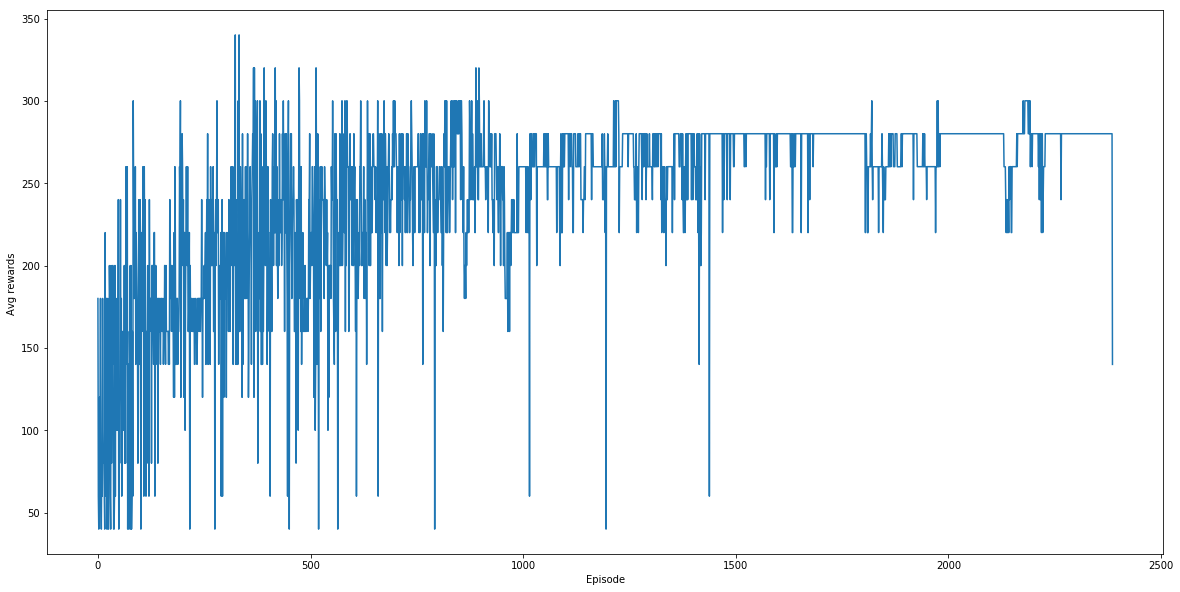

In [21]:
plt.figure(figsize=[20,10])
plt.plot(rewards_history)
plt.xlabel('Episode')
plt.ylabel('Avg rewards ')
plt.show()

## Q-Learning
In the cells above I talked about the term Q-learning and Deep Q-Learning, but are these algorithms? let us learn about them and try to implement them....<br>
Q-learning lets the agent use the environment's rewards to learn, over time, the best action to take in a given state. A **Q-value** for a particular state-action combination is representative of the "quality" of an action taken from that state. Better Q-values imply better chances of getting greater rewards.<br>
Q-values are initialized to an arbitrary value, and as the agent exposes itself to the environment and receives different rewards by executing different actions, the Q-values are updated using the equation:
> Q(state,action)←(1−α)Q(state,action)+α(reward+γmaxaQ(next state,all actions))

* α (alpha) is the learning rate (0<α≤1) - Just like in supervised learning settings, α is the extent to which our Q-values are being updated in every iteration.
* γ (gamma) is the discount factor (0≤γ≤1) - determines how much importance we want to give to future rewards. A high value for the discount factor (close to 1) captures the long-term effective award, whereas, a discount factor of 0 makes our agent consider only immediate reward, hence making it greedy.
<br>
We are updating, the Q-value of the agent's current state and action by first taking a weight (1−α) of the old Q-value, then adding the learned value. The learned value is a combination of the reward for taking the current action in the current state, and the discounted maximum reward from the next state we will be in once we take the current action.
<br>
maxaQ(next state,all actions), means that Q-value of the current step is based on the Q-value of the future step. This means that we initialize Q-Values for St and St+1 to some random values at first. In the first training iteration we update Q-Value in the state St based on reward and on those random value of Q-Value in the state St+1. Since reward is still guiding our system this will eventually converge to the best result. we are learning the proper action to take in the current state by looking at the reward for the current state/action combo, and the max rewards for the next state.
<br>
All these Q-Values are stored inside of the **Q-Table**, which is just the matrix with the rows for states and the columns for actions.
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Q-Learning_Matrix_Initialized_and_After_Training.png/440px-Q-Learning_Matrix_Initialized_and_After_Training.png)

## about implementation of q-learning
I have not implemented Q-learning, but here is a kenel I would definitely suggest <br>
[ConnectX with Q-Learning](https://www.kaggle.com/phunghieu/connectx-with-q-learning) by [Hieu Phung](https://www.kaggle.com/phunghieu). If u are interested then please go through this kernel.

## Deep Q-Learning
Deep Q-Learning harness the power of deep learning with so-called Deep Q-Networks. These are standard feed forward neural networks which are utilized for calculating Q-Value. In this case, the agent has to store previous experiences in a local memory and use max output of neural networks to get new Q-Value. <br>
The important thing to notice here is that Deep Q-Networks don’t use standard supervised learning, simply because we don’t have labeled expected output. We depend on the policy or value functions in reinforcement learning, so the target is continuously changing with each iteration. Because of this reason the agent doesn’t use just one neural network, but two of them. So, how does this all fit together? The first network, called Q-Network is calculating Q-Value in the state St, while the other network, called Target Network is calculating Q-Value in the state St+1. 
<br>
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/04/Screenshot-2019-04-17-at-12.48.05-PM-768x638.png)

In simple words Deep Q-learning is a combination of deep learning and Q-learning where the q-table is replaced by a deep neural network.
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/04/Screenshot-2019-04-16-at-5.46.01-PM.png)

In [22]:
K.clear_session()
class Agent_deepQ:
    def __init__(self, enviroment, optimizer):
        
        # Initialize atributes
        self.environment = environment
        self._state_size = enviroment.observation_space.n
        self._action_size = enviroment.action_space.n
        self._optimizer = optimizer
        self.space = None
        self.empty = []
        self.action_ = None

        self.expirience_replay = deque(maxlen=2000)

        # Initialize discount and exploration rate
        self.gamma = 0.7
        self.epsilon = 0.1

        # Build networks
        self.q_network = self._build_compile_model()
        self.target_network = self._build_compile_model()
        self.alighn_target_model()
        
    def _build_compile_model(self):
        model = tf.keras.Sequential()
        model.add(kl.Embedding(self._state_size, 100, input_length=1))
        model.add(kl.Reshape((100,)))
        model.add(kl.Dense(256, activation='relu'))
        model.add(kl.Dense(128, activation='relu'))
        model.add(kl.Dense(self._action_size, activation='linear'))
        
        model.compile(loss='mse', optimizer=self._optimizer)
        return model
    def alighn_target_model(self):
        self.target_network.set_weights(self.q_network.get_weights())
        
    def store(self, state, action, reward, next_state, terminated):
        self.expirience_replay.append((state, action, reward, next_state, terminated))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            self.action_ = int(np.random.choice([c for c in range(environment.config.columns) if state[c] == 0]))
        
        else:
            q_values = self.q_network.predict(state)        
            self.action_ = int(np.argmax(q_values[0]))
        self.space = [c for c in range(self.environment.config.columns) if (state[c] == 0)]
        if self.action_ not in self.space and self.space!=self.empty:
            self.act(state)
        return self.action_
    
    def preprocess(self, state):
        result = state.board[:]
        result.append(state.mark)
        return result
    
    def train(self, batch_size):
        minibatch = random.sample(self.expirience_replay, batch_size)
        for state, action, reward, next_state, terminated in minibatch:
            target = self.q_network.predict(state)
            if terminated:
                target[0][action] = reward
            else:
                next_state = self.preprocess(next_state)
                t = self.target_network.predict(next_state)
                target[0][action] = reward + self.gamma*np.amax(t)
                self.q_network.fit(np.array(state), np.array(target), epochs=1, verbose=0)
            

In [23]:
environment = ConnectX()

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
agent = Agent_deepQ(environment, optimizer)

batch_size = 32
num_of_episodes = 800
timesteps_per_episode = 500
agent.q_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 100)            4200      
_________________________________________________________________
reshape (Reshape)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 903       
Total params: 63,855
Trainable params: 63,855
Non-trainable params: 0
_________________________________________________________________


In [25]:
reward_ = 0
total_reward = []
for e in range(num_of_episodes):
    # Reset the enviroment
    state = environment.reset()    
    terminated=False
    for time_step in range(timesteps_per_episode):
        state = agent.preprocess(state)
        # Run Action
        action = agent.act(state)
        # Take action 
        next_state, reward, terminated, info = environment.step(action)
        agent.store(state, action, reward, next_state, terminated)
        state = next_state
        reward_+=reward
        if terminated:
            agent.alighn_target_model()
            total_reward.append(reward_)
            reward_ = 0
            break
            
        if len(agent.expirience_replay) > batch_size:
            agent.train(batch_size)
    if (e + 1) % 10 == 0:
        print("**********************************")
        print("Episode: {}".format(e + 1))
        environment.render()
        print("**********************************")

**********************************
Episode: 10
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 2 | 0 | 0 | 0 | 0 | 0 | 0 |
+---+---+---+---+---+---+---+
| 2 | 0 | 0 | 0 | 1 | 0 | 0 |
+---+---+---+---+---+---+---+
| 2 | 0 | 0 | 0 | 1 | 0 | 0 |
+---+---+---+---+---+---+---+
| 2 | 0 | 0 | 1 | 1 | 0 | 0 |
+---+---+---+---+---+---+---+

**********************************
**********************************
Episode: 20
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 1 | 0 | 0 |
+---+---+---+---+---+---+---+
| 0 | 0 | 0 | 0 | 1 | 0 | 0 |
+---+---+---+---+---+---+---+
| 2 | 0 | 0 | 0 | 2 | 0 | 0 |
+---+---+---+---+---+---+---+
| 2 | 0 | 0 | 0 | 1 | 0 | 0 |
+---+---+---+---+---+---+---+
| 2 | 0 | 0 | 0 | 1 | 0 | 0 |
+---+---+---+---+---+---+---+
| 2 | 0 | 0 | 0 | 1 | 0 | 0 |
+---+---+---+---+---+---+---+

**********************************
**********************************
Episode: 30
+---+--

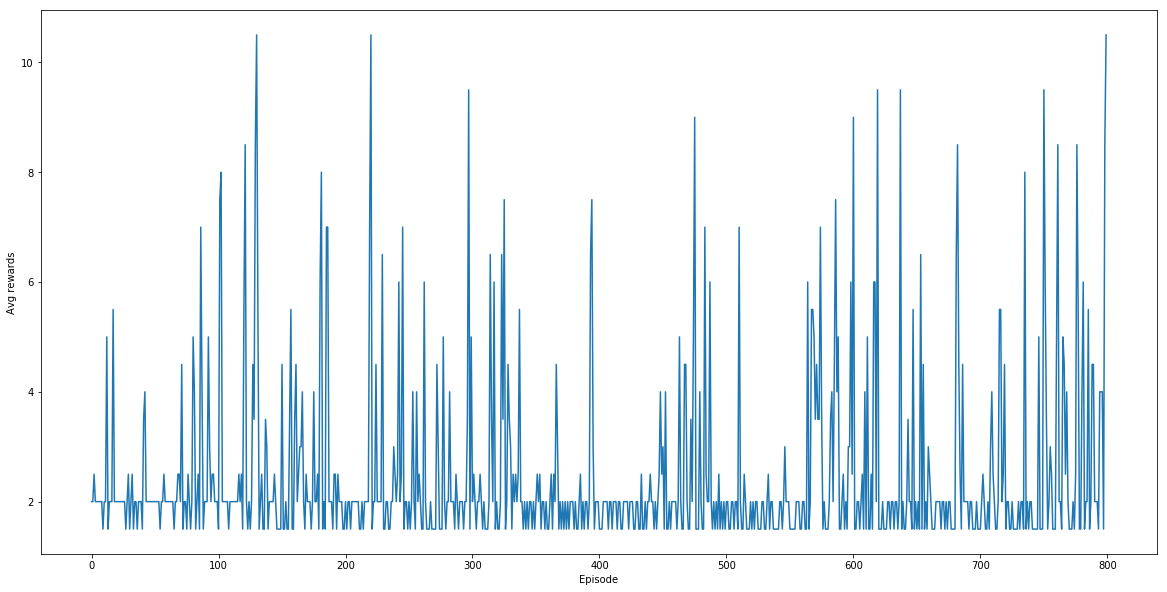

In [26]:
plt.figure(figsize=[20,10])
plt.plot(total_reward)
plt.xlabel('Episode')
plt.ylabel('Avg rewards')
plt.show()

## My personal confession
This my first time, dealing with reinforcement learning. I dont even know how much this kernel would be helpful to others. I am very much thankful to kaggle for organizing this competition and creating an opportunity to learn about this beautiful piece of A.I. 
<br>
I went through various websites and Notebooks related to this competition, learned from all of them and tried to give a compilation of all of them. It was fun to learn re-enforcement learning, and would definitely suggest other people to go through this topic even though you might say that your topics of interest are only machine learning and deep learning. I might be wrong about the concept or wrong from the implementation point of view. So do feel free to correct me in the comment section below.
<br>
In the cell below I have mentioned the resources that have helped me through this journey, so please go through them for a more detailed explanation.
<br><br>
**Thank you**

## Future Scopes
I tried to solve this probem with tensorflow-agent but I failed due to some errors while training. I would suggest you all to use Tensorflow-agent to solve this problem.

link to tensorflow-agent - https://github.com/tensorflow/agents

## Credits
* https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
* http://inoryy.com/post/tensorflow2-deep-reinforcement-learning/
* https://www.freecodecamp.org/news/an-intro-to-advantage-actor-critic-methods-lets-play-sonic-the-hedgehog-86d6240171d/
* https://towardsdatascience.com/deep-reinforcement-learning-tutorial-with-open-ai-gym-c0de4471f368
* Also very much thankful to AnalyticsVidhya and Geek forGeeks for their wonderful explaination.
* The Notebooks related to this competition is also very inspirational.